In [ ]:
#Retail & E-Commerce

# Instacart Market Basket Analysis
# Kaggle

#data
#https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis/data

#class data doc
#https://docs.google.com/document/d/1BsJIWU4TKUkADvnNEC14b8coQ5VqslJtS7ZBCYJVZAk/edit?tab=t.ta49d25hofw5#heading=h.bbadcysas44j

Class: DX699 02 - AI for Leaders<br>
Author: Carlos Jaime<br>
Date: 02/17/2026
<hr>

# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

<br>
<br>
<br>
<br>
<br>
The histogram shows the full shape of the distribution. I can see skewness and clustering, but it depends on bin size.

The boxplot is more compact. It clearly shows the median, spread, and outliers, but hides the detailed shape.

If I want to compare expensive drugs to typical prices, I would choose the boxplot because it highlights the upper tail clearly. I would add percentile lines or use a log scale to improve clarity.

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

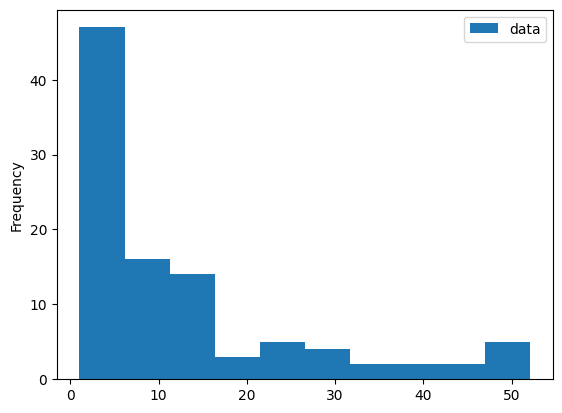

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

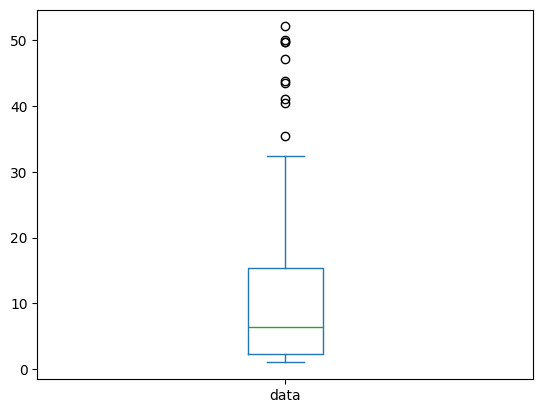

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

#### Loading data & Libs

In [7]:
import os
import glob
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [8]:
base = "../data/Retail_and_ECommerce/Instacart_Market_Basket_A"
out_path = os.path.join(base, "instacart_merged.parquet")
df = pd.read_parquet(out_path)

In [9]:
df.sample(5)

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
27449263,1759940,13380,29,0,199382,prior,18,5,12,10.0,Organic Blue Corn Tortilla Chips,107,19,chips pretzels,snacks
25022517,1362055,521,11,0,38914,prior,5,3,9,7.0,Daily Shower Cleaner Ylang Ylang,114,17,cleaning products,household
24289137,1997799,42265,13,1,125586,prior,20,0,9,2.0,Organic Baby Carrots,123,4,packaged vegetables fruits,produce
15387456,2622786,25890,8,1,47663,prior,15,6,9,13.0,Boneless Skinless Chicken Breasts,49,12,packaged poultry,meat seafood
27977288,1815829,33682,30,1,137629,prior,79,1,14,5.0,Total 2% Greek Mixed Berries Yogurt,120,16,yogurt,dairy eggs


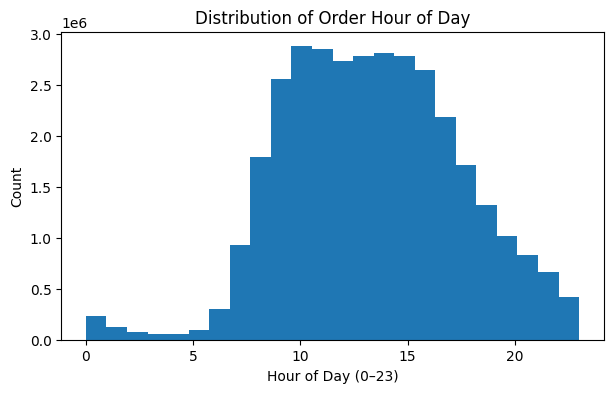

count    3.381911e+07
mean     1.343123e+01
std      4.246149e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: order_hour_of_day, dtype: float64

In [10]:
plt.figure(figsize=(7,4))
plt.hist(df["order_hour_of_day"], bins=24)
plt.title("Distribution of Order Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Count")
plt.show()

df["order_hour_of_day"].describe()

Orders peak during late morning and early afternoon. Very few occur overnight.

The distribution is not normal. It is concentrated in daytime hours.

Min is 0 and max is 23, which confirms valid formatting.
<br>
<br>
<br>

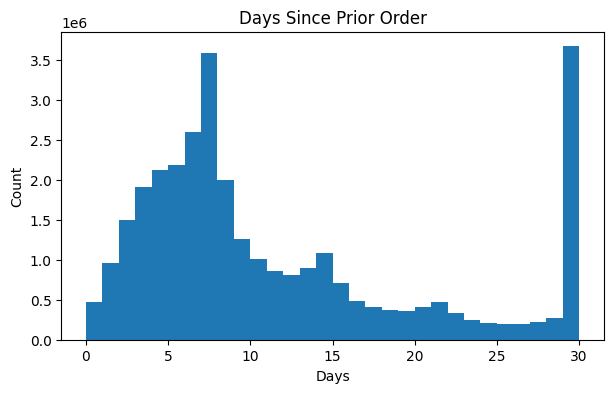

count    3.174104e+07
mean     1.136415e+01
std      8.940500e+00
min      0.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [11]:
plt.figure(figsize=(7,4))
plt.hist(df["days_since_prior_order"].dropna(), bins=30)
plt.title("Days Since Prior Order")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

df["days_since_prior_order"].describe()

The distribution is right skewed with a strong spike at 7 days. This suggests weekly shopping behavior.

Min is 0 and max is 30. The 30 likely reflects a cap.

It is not normally distributed.
<br>
<br>
<br>

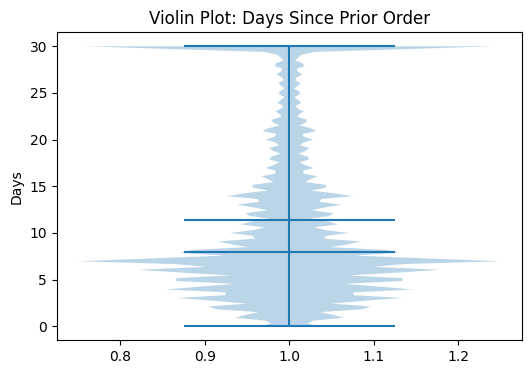

In [17]:

x = df["days_since_prior_order"].dropna()

plt.figure(figsize=(6,4))
plt.violinplot(x, showmeans=True, showmedians=True)
plt.title("Violin Plot: Days Since Prior Order")
plt.ylabel("Days")
plt.show()

The violin plot shows the density of the distribution. The thickness represents where values are concentrated. It confirms the right skew and highlights the spike around weekly ordering behavior.
<br>
<br>
<br>

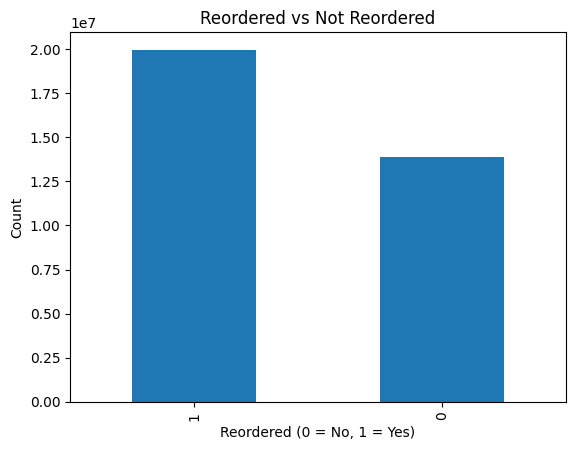

reordered
1    0.590062
0    0.409938
Name: proportion, dtype: float64

In [12]:
df["reordered"].value_counts().plot(kind="bar")
plt.title("Reordered vs Not Reordered")
plt.xlabel("Reordered (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

df["reordered"].value_counts(normalize=True)

A large portion of items are reordered. This shows repeat purchasing behavior.

This is a binary variable, so it does not follow a continuous distribution.
<br>
<br>
<br>

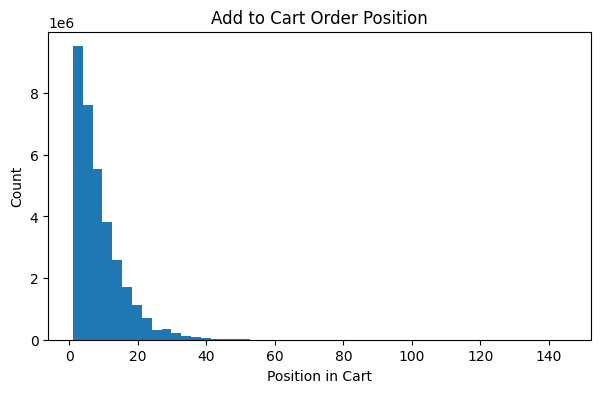

In [13]:
plt.figure(figsize=(7,4))
plt.hist(df["add_to_cart_order"], bins=50)
plt.title("Add to Cart Order Position")
plt.xlabel("Position in Cart")
plt.ylabel("Count")
plt.show()

Most items are added early in the cart. The distribution is heavily right skewed.

Min is 1 and higher values represent larger baskets.
<br>
<br>
<br>

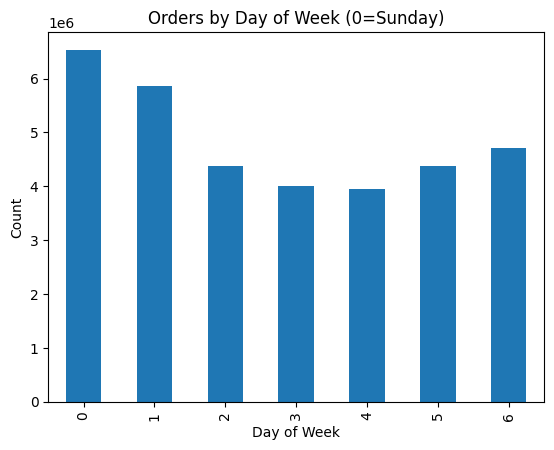

In [14]:
df["order_dow"].value_counts().sort_index().plot(kind="bar")
plt.title("Orders by Day of Week (0=Sunday)")
plt.xlabel("Day of Week")
plt.ylabel("Count")
plt.show()

Orders are fairly balanced across the week with slight increases near weekends.

The distribution is stable and not extreme.
<br>
<br>
<br>

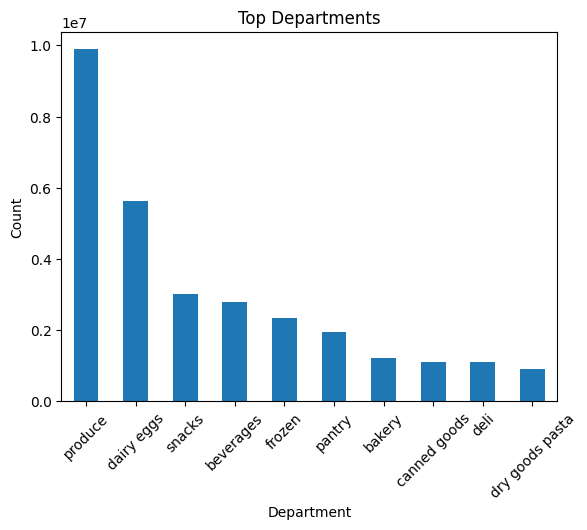

In [15]:
df["department"].value_counts().head(10).plot(kind="bar")
plt.title("Top Departments")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

A few departments dominate total volume. The distribution is highly skewed toward major grocery categories.
<br>
<br>
<br>

<hr>

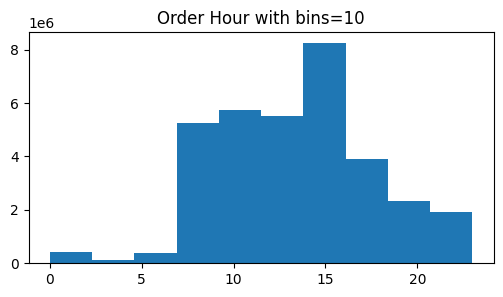

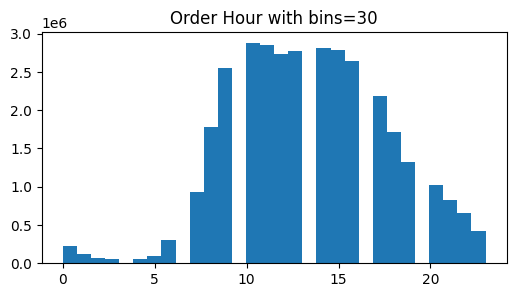

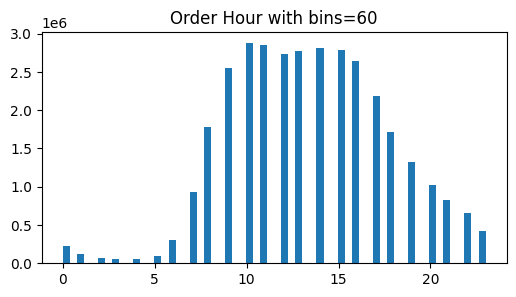

In [16]:
for bins in [10, 30, 60]:
    plt.figure(figsize=(6,3))
    plt.hist(df["order_hour_of_day"], bins=bins)
    plt.title(f"Order Hour with bins={bins}")
    plt.show()

Fewer bins smooth the distribution. More bins reveal more detail.

Bin width affects interpretation.
<br>
<br>
<br>

<hr>

#### Conclusioin

The Instacart dataset reflects realistic shopping behavior. Orders are concentrated in late morning and early afternoon, with very little overnight activity. There is a clear spike at 7 days between orders, which suggests weekly purchasing patterns. Reordering is common, showing repeat buying behavior. Most numerical variables are right skewed rather than normal. All values fall within expected ranges, and the dataset appears clean and usable for further modeling.

